
# Diseño de software para cómputo científico

----

Property Based Testing

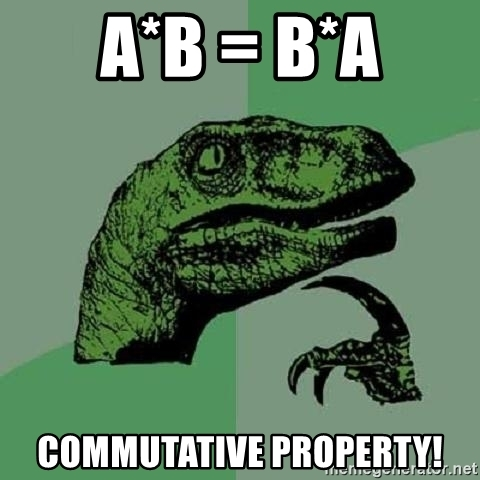


## Property base testing

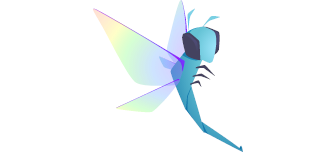

Paper seminal:

> Claessen, K., & Hughes, J. (2011). QuickCheck: a lightweight tool for random testing of Haskell programs. Acm sigplan notices, 46(4), 53-64.


<small>Fuente: <a href="https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/">https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/</a></small>

## Part 1: Example-based testing

- Given a test input `I`
- When passed to function under test
- should return an output `O`

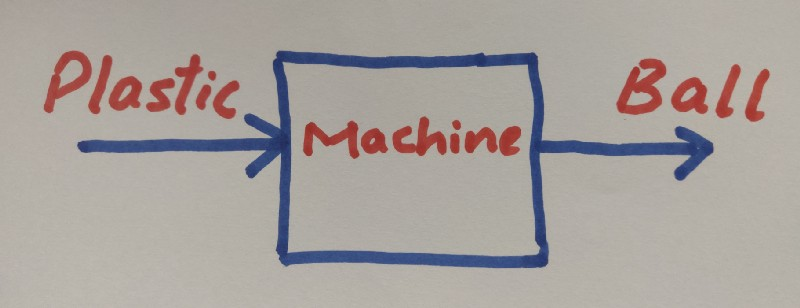

Probemos esta máquina con testing basado en ejemplos

- take a blue-coloured raw plastic (fixed test data)
- feed the plastic to machine
- expect a blue-coloured plastic ball as output (fixed test output)

## Lo mismo pero con un programa

In [ ]:
# test_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2
 

def test_sum():
    assert sum(1, 2) == 3


In [ ]:
!pytest 10_PBT/test_example.py -v

## Este test es suficiente para **validar** la funcionalidad de `sum()`?

- La respuesta simple es no.
- Podemos usar parametrización de pytest para mejorar esto

In [ ]:
# test_param_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


import pytest


@pytest.mark.parametrize('num1, num2, expected',
    [(3, 5, 8), (-2, -2, -4), (-1, 5, 4), (3, -5, -2), (0, 5, 5) ]
)
def test_sum(num1, num2, expected):
    assert sum(num1, num2) == expected

In [ ]:
!pytest 10_PBT/test_param_example.py -v

Pero es esencialmente más de lo mismo. Lo cual nos lleva a al primer problema de los testings basados en ejemplos

## Issue 1: La exhaustividad depende de la persona que escribe los tests

- La persona puede querer escribir 5, 50 o 500 tests.
- Pero nunca puede estar seguro si logro probar todo. (sobre todos los edge cases)

Lo cual nos lleva al segundo problema

##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


Nos dieron todos los detalles de la función sum?


- Que tipo de input espera la función?
- Como debe comportarse la funcion frente a inputs inesperados?
- Que tipo de output debe retornar nuestra función?



##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


O si lo ponemos en contexto de nuestro código:

- `num1` y `num2` tienen que ser `int` o `float`? pueden ser `str`?
- Hay cotas minimas y maximas para `num1` y `num2`?
- Como manejo `None`?
- El retorno tiene que ser `int` o `float`?
- Cuales ecenarios justifican mensajes de errores?
- Hay algun ecenario donde pueda engañar al test?

In [ ]:
# test_buggy_example.py

def sum(num1, num2):
    """Buggy logic"""
    results = {(3, 5): 8, (-2, -2): -4, (-1, 5): 4, (3, -5): -2, (0, 5): 5}
    return results.get((num1, num2))

import pytest 
@pytest.mark.parametrize(
    'num1, num2, expected',
    [(3, 5, 8), (-2, -2, -4), (-1, 5, 4), (3, -5, -2), (0, 5, 5)])
def test_sum(num1, num2, expected):
    assert sum(num1, num2) == expected

In [2]:
!pytest 05_PBT/test_buggy_example.py

============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0
rootdir: /home/juanbc/proyectos/dis_ssw/src/unidad3
plugins: hypothesis-6.54.5, anyio-3.6.1
collected 5 items                                                              

05_PBT/test_buggy_example.py .....                                       [100%]

============================== 5 passed in 0.01s ===============================


## Property-based testing

Es un método de prueba de software en el que se definen propiedades generales que un sistema bajo prueba debe satisfacer, y luego se generan automáticamente datos de entrada aleatorios para verificar estas propiedades.

$$\forall x \in D : P(x) = true$$

Donde:
- $x$ es un elemento del conjunto de datos de entrada
- $D$ es el dominio de todos los posibles datos de entrada
- $P(x)$ es una propiedad que debe ser verdadera para todos los $x$

PBT consiste en:

Definir una propiedad $P(x)$ que debe ser verdadera para todos los inputs válidos.
Generar un conjunto de casos de prueba $T = {x_1, x_2, ..., x_n} \subset D$, donde $D$ es el dominio de todos los posibles inputs.
Evaluar: $\forall i \in {1, ..., n} : P(x_i)$
Verificar: $\nexists i : P(x_i) = false$

Si en algún momento se encuentra un $x_i$ tal que $P(x_i) = false$, se ha encontrado un contraejemplo, lo cual indica un error en el sistema bajo prueba.
El objetivo es maximizar la probabilidad de encontrar un $x_i$ tal que $P(x_i) = false$, si tal $x_i$ existe.

## Hypotesis testing

In [ ]:
!pip install hypothesis

In [3]:
# test_property_example.py

def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


from hypothesis import given
from hypothesis import strategies as st


@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

In [4]:
!pytest 05_PBT/test_example.py -s

============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0
rootdir: /home/juanbc/proyectos/dis_ssw/src/unidad3
plugins: hypothesis-6.54.5, anyio-3.6.1
collected 1 item                                                               

05_PBT/test_example.py .

============================== 1 passed in 0.00s ===============================


## Hypotesis testing - Verbose

In [ ]:
# test_property_v_example.py

from hypothesis import given, settings, Verbosity, example
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
@example(1, 2)
@example(0, 0)
@example(10000, 2000000)
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

In [5]:
!pytest 05_PBT/test_property_v_example.py -v -s

============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/juanbc/proyectos/dis_ssw/bin/python
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('/home/juanbc/proyectos/dis_ssw/src/unidad3/.hypothesis/examples')
rootdir: /home/juanbc/proyectos/dis_ssw/src/unidad3
plugins: hypothesis-6.54.5, anyio-3.6.1
collected 1 item                                                               

05_PBT/test_property_v_example.py::test_sum Trying example: test_sum(
    num2=0, num1=0,
)
Trying example: test_sum(
    num2=0, num1=0,
)
Trying example: test_sum(
    num2=0, num1=0,
)
Trying example: test_sum(
    num2=0, num1=0,
)
Trying example: test_sum(
    num2=-1791180025, num1=-10754,
)
Trying example: test_sum(
    num2=0, num1=0,
)
Trying example: test_sum(
    num2=1674, num1=15999,
)
Trying example: test_sum(
    num2=0, num1=0,
)
Trying example: test_sum(
   

## Las estrategias son desgraciadas

In [6]:
st.lists(st.text(), min_size=5, unique=True).example()

['\x1aø\U0007e6bc\x0f\nÄ',
 'h\x1d',
 '\x81p',
 '0ê\x1f\U00098a40/\x9f\x81',
 '',
 '©\U0006d059',
 '\U0007afa6\x80\x89ÃSL°¾',
 'Þ\x1d<']

In [7]:
st.dictionaries(st.characters(), st.floats(), min_size=3).example()

{'â': 5e-324,
 'j': 0.5,
 '1': 173.0,
 '\U00069e8b': 1.7976931348623157e+308,
 'J': 1.7976931348623157e+308,
 'K': 5.32132405739819e+16,
 '-': -1.2114354972202112e+16,
 '\x00': -1.192092896e-07,
 'ð': -0.99999,
 '\x8a': -7.08111546865331e+16,
 'H': -inf}

Sobre las estrategias: https://hypothesis.readthedocs.io/en/latest/data.html

## Hay estrategias para el stack científico

In [8]:
from hypothesis.extra import numpy as npst

npst.arrays(float, (3, 4), elements=None, fill=None, unique=True).example()

array([[-5.00000000e-001,  1.90000000e+000,  1.50000000e+000,
         2.22507386e-311],
       [-9.00719925e+015, -6.09839929e+016,             -inf,
         1.00000000e-005],
       [-2.22044605e-016, -3.33333333e-001, -3.50797668e+016,
         9.00719925e+015]])

In [9]:
from hypothesis.extra import pandas as pdst

pdst.data_frames([
    pdst.column('A', dtype=int, unique=True), 
    pdst.column('B', dtype=float, unique=True)]).example()

,A,B
0,255,8.556964e+09


## Pensando en propiedades reales

- Al parecer la suma es conmutativa.
- Sumar cero a un valor devuelve el mismo valor
- Si sumamos dos numeros y restamos uno de los dos, nos da el otro.

In [ ]:
from hypothesis import given, settings, Verbosity
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(0, num2) == num2
    assert sum(num1, num2) == sum(num2, num1)
    assert sum(num1, num2) - num1 == num2

## Shrinking

- Hasta ahora todo es razonable de programar.
- Pero la inferencia es solo parte del truco.

In [ ]:
@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(num1, num2) == sum(num2, num1)
    assert num1 <= 30

In [10]:
!pytest 05_PBT/test_property_srink_example.py 

============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0
rootdir: /home/juanbc/proyectos/dis_ssw/src/unidad3
plugins: hypothesis-6.54.5, anyio-3.6.1
collected 1 item                                                               

05_PBT/test_property_srink_example.py F                                  [100%]

=================================== FAILURES ===================================
___________________________________ test_sum ___________________________________

    @settings(verbosity=Verbosity.verbose)
>   @given(st.integers(), st.integers())

05_PBT/test_property_srink_example.py:10: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

num1 = 31, num2 = 0

    @settings(verbosity=Verbosity.verbose)
    @given(st.integers(), st.integers())
    def test_sum(num1, num2):
        assert sum(num1, 0) == num1
        assert sum(num1, num2) == sum(num2, num1)
>       ass

Hypotesis trata de encontrar el ejemplo minimo entendible para un ser humano

### Estrategias custom

In [18]:
import attr

@attr.s(hash=True)
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()

In [21]:
PersonaStrategy = st.lists(st.builds(
  Persona,
  st.text(min_size=5, max_size=10),
  st.integers(min_value=0, max_value=80)), min_size=3, unique=True)

@given(PersonaStrategy)
def test_persona(persona):
    assert persona.edad <= 120
    assert persona.edad >= 0                 
                                       

In [20]:
PersonaStrategy.example()

[Persona(name='\U0006b737\x07\U000160d3JÒ%/\x80', edad=47),
 Persona(name='\x81\x12Ûh\U000cfc82', edad=38),
 Persona(name='\U000fe4f1\ng³\x93', edad=41),
 Persona(name='?LØl{\x03끷', edad=74),
 Persona(name='\U0007b40bnúão', edad=50),
 Persona(name='\U000321ed$cô\U000d701aäà\U000a13f0', edad=35),
 Persona(name='²@\x8a\x92\x12', edad=42)]

### Estrategias custom (con composición)

In [22]:
import attr
@attr.s(hash=True)
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()
    mayor_de_edad: bool = attr.ib()

In [23]:
@st.composite
def persona_stategy(draw):
    name = draw(st.text(min_size=5, max_size=80))
    age = draw(st.integers(min_value=0, max_value=17))
    mayor_de_edad = draw(st.booleans())
    return Persona(name, age, mayor_de_edad)


In [24]:
persona_stategy().example()

Persona(name='ä2r*\x04\x95ø', edad=12, mayor_de_edad=False)

## Un caso "más" real

In [13]:
import math

from hypothesis import given, strategies as st

# We assume this is the distance function we want to test
def distance(x, y):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x, y)))

# Strategy to generate points in a 2D space
point_strategy = st.lists(
    st.floats(
        min_value=-1e10, max_value=1e10, allow_nan=False, 
        allow_infinity=False, allow_subnormal=False
    ),
    min_size=2, max_size=2
)

@given(point_strategy, point_strategy, point_strategy)
def test_distance_properties(p1, p2, p3):
    # 1. Non-negativity: d(x,y) >= 0
    assert distance(p1, p2) >= 0, "Distance must be non-negative"
    
    # 2. Symmetry: d(x,y) = d(y,x)
    assert math.isclose(distance(p1, p2), distance(p2, p1)), "Distance must be symmetric"
    
    # 3. Triangle inequality: d(x,z) <= d(x,y) + d(y,z)
    d_p1_p3 = distance(p1, p3)
    d_p1_p2 = distance(p1, p2)
    d_p2_p3 = distance(p2, p3)
    assert d_p1_p3 <= d_p1_p2 + d_p2_p3, "Must satisfy the triangle inequality"

In [14]:
test_distance_properties()